## 期末課題

In [2]:
# Webサイトのクローリング用ライブラリのインストール
!pip install icrawler

  Created wheel for icrawler: filename=icrawler-0.6.4-py2.py3-none-any.whl size=35063 sha256=bacf1903c5205ea55694b1bd85c6540c4d43186166f54af71029e65774db46bf
  Stored in directory: /root/.cache/pip/wheels/34/9a/e6/a8bc00ac61ff1f0e613af0d181feaef49ed226915ee7ff19d1
Successfully built icrawler


In [3]:
from icrawler.builtin import BingImageCrawler

#### ダウンロード（クローリング）の実行

In [4]:
# ダウンロード場所の設定
crawler = BingImageCrawler(storage={"root_dir":"dog"})

# オプションの設定
filters = dict(color='color')

In [5]:
# ディレクトリに画像をダウンロード
crawler.crawl(keyword="dog", filters=filters, max_num=1000)

# 同様にcatの画像をcatディレクトリにダウンロード
crawler = BingImageCrawler(storage={"root_dir":"cat"})
filters = dict(color='color')
crawler.crawl(keyword="cat", filters=filters, max_num=1000)

2021-07-23 11:31:39,038 - INFO - icrawler.crawler - start crawling...
2021-07-23 11:31:39,039 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-07-23 11:31:39,049 - INFO - icrawler.crawler - starting 1 parser threads...
2021-07-23 11:31:39,052 - INFO - icrawler.crawler - starting 1 downloader threads...
2021-07-23 11:31:39,352 - INFO - parser - parsing result page https://www.bing.com/images/async?q=dog&first=0&qft=+filterui:color2-color
2021-07-23 11:31:39,547 - INFO - downloader - image #1	https://newtownsquarevet.com/wp-content/uploads/2013/12/Dog-smiling-952x1024.jpg
2021-07-23 11:31:39,711 - INFO - downloader - image #2	https://media.mercola.com/ImageServer/Public/2018/October/FB/dog-breeds-for-active-people-fb.jpg
2021-07-23 11:31:40,943 - INFO - downloader - image #3	https://www.fitbark.com/wp-content/uploads/2019/02/FitBark_dog_stick_chewing.jpg
2021-07-23 11:31:41,113 - INFO - downloader - image #4	https://www.insideedition.com/sites/default/files/images/2019-06/ge

#### ダウンロードした画像の表示

In [6]:
# dogが入っているディレクトリから画像ファイルのリストを取得し、20枚を並べて表示してみる
from os import listdir
import matplotlib.pyplot as plt
import cv2

path = "/content/dog/"
imagesList = listdir(path)
print(imagesList)

fig=plt.figure(figsize=(20,20))
columns = 5
rows = 4

['000112.jpg', '000174.jpg', '000357.jpg', '000154.jpg', '000617.jpg', '000470.jpg', '000529.jpg', '000087.jpg', '000173.jpg', '000440.jpg', '000205.jpg', '000608.jpg', '000278.jpg', '000331.jpg', '000532.jpg', '000601.jpg', '000196.jpg', '000256.jpg', '000262.jpg', '000389.jpg', '000169.jpg', '000296.jpg', '000204.jpg', '000275.jpg', '000598.jpg', '000292.jpg', '000390.jpg', '000047.jpg', '000544.jpg', '000097.jpg', '000422.jpg', '000548.jpg', '000044.jpg', '000122.jpg', '000314.jpg', '000402.jpg', '000319.jpg', '000120.jpg', '000160.jpg', '000475.jpg', '000395.jpg', '000116.jpg', '000281.jpg', '000089.jpg', '000517.jpg', '000304.jpg', '000166.jpg', '000417.jpg', '000088.jpg', '000254.jpg', '000124.jpg', '000186.jpg', '000484.jpg', '000312.jpg', '000631.jpg', '000469.jpg', '000247.jpg', '000271.jpg', '000037.jpg', '000322.jpg', '000511.jpg', '000458.jpg', '000599.jpg', '000398.jpg', '000175.jpg', '000359.jpg', '000257.jpg', '000066.jpg', '000339.jpg', '000078.jpg', '000134.jpg', '0003

<Figure size 1440x1440 with 0 Axes>

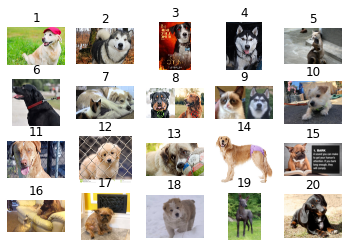

In [7]:
# dogが入っているディレクトリから画像ファイルのリストを取得し、20枚を並べて表示してみる
i=1
for file in imagesList:
    img_bgr= cv2.imread(path+file)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.subplot(rows, columns, i)
    plt.title(i)
    plt.imshow(img_rgb)
    plt.axis('off')
    if i<20:
      i=i+1
    else:
      break
plt.show()

#### データの設定

In [8]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from os import listdir
import numpy as np

In [9]:
# クラスラベルをリストとして設定
classes = ["dog", "cat"]

# リスト長から総クラス数の取得
num_classes = len(classes)

# 各クラスの画像から評価に使うデータ数を設定
num_testdata = 50

# 各データ格納用の空リストの準備
X_train, X_test, y_train, y_test = [], [], [], []

In [10]:
# クラスラベルをリストとして設定
for index, label in enumerate(classes):
    path = "/content/" + label + "/"
    imagesList = listdir(path)

    for i, img in enumerate(imagesList):

        img = img.strip()
        img = path + img
        temp_img = load_img(img, grayscale=False, target_size=(256,256))
        temp_img_array = img_to_array(temp_img) / 255

        if i < num_testdata:
            X_test.append(temp_img_array)
            y_test.append(index)
        else:
            X_train.append(temp_img_array)
            y_train.append(index)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  " Skipping tag %s" % (size, len(data), tag)


In [11]:
# 各データをnumpy.array形式に変換
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

# 各データの形式・サイズの確認
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1265, 256, 256, 3)
(100, 256, 256, 3)
(1265,)
(100,)


#### クラスラベルの変換

In [12]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(1265, 2)
(100, 2)


#### ネットワーク構築の準備

In [13]:
from tensorflow.keras import layers
from tensorflow. keras import models

model1 = models.Sequential()
# # 前章を参考に以下を自分でコーディング
# インスタンス名が model1 であることに注意

# Conv層：　フィルタ数：32、フィルタサイズ：3×3、ReLU 入力画像サイズ：256×256×3チャネル
# MaxPooling層：　サイズ：2×2
# Conv層：　フィルタ数：64、フィルタサイズ：3×3、ReLU
# MaxPooling層：　サイズ：2×2
# Conv層：　フィルタ数：128、フィルタサイズ：3×3、ReLU
# MaxPooling層：　サイズ：2×2
# Conv層：　フィルタ数：128、フィルタサイズ：3×3、ReLU
# MaxPooling層：　サイズ：2×2
# テンソルのフラット化
# Dense層：　ユニット数：512、ReLU
# 出力層（Dense層）：　ユニット数：num_classes、softmax

# ==================================================================
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(num_classes, activation='softmax'))
# ==================================================================

In [14]:
# ネットワークの構造の確認
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1

#### モデルのコンパイル


In [15]:
from tensorflow.keras import optimizers
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


#### 学習の実行・モデルの保存


In [16]:
# まず、batch size:5、エポック数:20で学習してみる（かなり適当な値）
history1 = model1.fit(X_train, y_train, epochs=20, batch_size=5, validation_data=(X_test, y_test))

# 以下でモデルの保存が可能
model1.save('cats_and_dogs_1.h5')

Epoch 1/20
253/253 [==============================] - 36s 15ms/step - loss: 0.6974 - acc: 0.5296 - val_loss: 0.6862 - val_acc: 0.6000
Epoch 2/20
253/253 [==============================] - 4s 14ms/step - loss: 0.6748 - acc: 0.5945 - val_loss: 0.7128 - val_acc: 0.5300
Epoch 3/20
253/253 [==============================] - 4s 15ms/step - loss: 0.6315 - acc: 0.6427 - val_loss: 0.6837 - val_acc: 0.6000
Epoch 4/20
253/253 [==============================] - 4s 14ms/step - loss: 0.5703 - acc: 0.7059 - val_loss: 0.6999 - val_acc: 0.5800
Epoch 5/20
253/253 [==============================] - 4s 14ms/step - loss: 0.4900 - acc: 0.7542 - val_loss: 0.7358 - val_acc: 0.5600
Epoch 6/20
253/253 [==============================] - 4s 15ms/step - loss: 0.3848 - acc: 0.8261 - val_loss: 0.9227 - val_acc: 0.6100
Epoch 7/20
253/253 [==============================] - 4s 15ms/step - loss: 0.2888 - acc: 0.8775 - val_loss: 1.0062 - val_acc: 0.5600
Epoch 8/20
253/253 [==============================] - 4s 15ms/step -

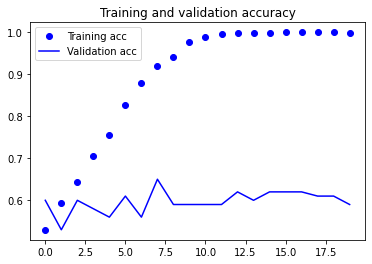

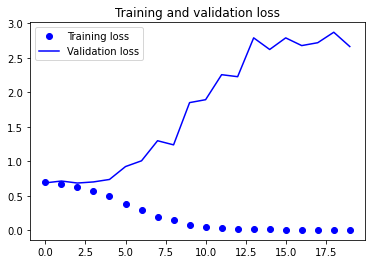

In [17]:
# 学習時の損失と認識精度のプロット
import matplotlib.pyplot as plt
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##### この結果から何が言えるか？
***
- traningのデータは学習が進むごとにAccuracyが向上し、epochsが７以上ではtraining accは0.9以上になっているのに対してvalidationのデータはepochsが3まではvalidation accが向上していたが、それ以降はおよそ0.55付近の値となった。
- trainingのデータは学習が進むごとにlossが減少し、epochsが8以上ではtraining lossはおよそ0.0ほどになっているのに対してvalidationのデータはepochsが３まではvalidation accあまり変化がなかったもののそれ以降は増加し、epochsが18の時にはおよそ3.5付近の値となった。
- これらの結果から、今回の学習ではtrainingのデータのaccuracyは向上したもののvalidationのデータのaccuracyは向上しなかったことからtrainingデータに過学習していると考えられる。

#### Generatorの設定

In [18]:
# ライブラリのimport
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generatorのインスタンスの生成
train_datagen = ImageDataGenerator()
gen = train_datagen.flow(X_train, batch_size=5, shuffle=False)

#### 画像の確認

(5, 256, 256, 3)


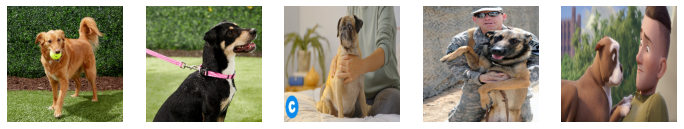

In [19]:
batches = gen.next()
print(batches.shape)
from tensorflow.keras.preprocessing.image import array_to_img
fig = plt.figure(figsize=(12, 5))
for i in range(len(batches)):
    gen_img = array_to_img(batches[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(gen_img)
    plt.axis('off')
plt.show()

#### Data Augmentationの実行

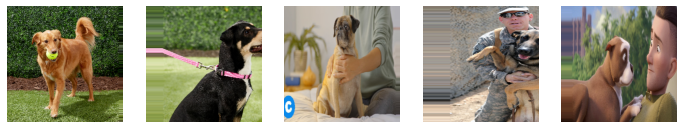

In [20]:
# 確認用
train_datagen2 = ImageDataGenerator(width_shift_range=0.3)
gen2 = train_datagen2.flow(X_train, batch_size=5, shuffle=False)
batches = gen2.next()

fig = plt.figure(figsize=(12, 5))
for i in range(len(batches)):
    gen_img = array_to_img(batches[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(gen_img)
    plt.axis('off')
plt.show()

#### 学習及び評価用のGeneratorの設定・生成


In [21]:
# 実験用
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator()

In [22]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=5)
val_generator = val_datagen.flow(X_test, y_test, batch_size=5, shuffle=False)

#### 再度、ネットワークの構築

In [23]:
# model2で構築

# Conv層：　フィルタ数：32、フィルタサイズ：3×3、ReLU 入力画像サイズ：256×256×3チャネル
# MaxPooling層：　サイズ：2×2
# Conv層：　フィルタ数：64、フィルタサイズ：3×3、ReLU
# MaxPooling層：　サイズ：2×2
# Conv層：　フィルタ数：128、フィルタサイズ：3×3、ReLU
# MaxPooling層：　サイズ：2×2
# Conv層：　フィルタ数：128、フィルタサイズ：3×3、ReLU
# MaxPooling層：　サイズ：2×2
# テンソルのフラット化
# Dense層：　ユニット数：512、ReLU
# 出力層（Dense層）：　ユニット数：num_classes、softmax

# ==================================================================
model2 = models.Sequential()

model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(num_classes, activation='softmax'))
# ==================================================================

#### コンパイル・学習・保存

In [24]:
# 同じ設定でコンパイル
model2.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['acc'])

# 学習の実施（history2としてログを記録）
history2 = model2.fit(train_generator, steps_per_epoch=X_train.shape[0]//5, epochs=20, validation_data=val_generator, validation_steps=X_test.shape[0]//5)

# 再度学習したモデルを保存
model2.save('cats_and_dogs_2.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
253/253 [==============================] - 19s 73ms/step - loss: 0.6985 - acc: 0.5289 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/20
253/253 [==============================] - 19s 76ms/step - loss: 0.6907 - acc: 0.5352 - val_loss: 0.6958 - val_acc: 0.4800
Epoch 3/20
253/253 [==============================] - 19s 74ms/step - loss: 0.6830 - acc: 0.5621 - val_loss: 0.6958 - val_acc: 0.6100
Epoch 4/20
253/253 [==============================] - 18s 72ms/step - loss: 0.6760 - acc: 0.5794 - val_loss: 0.7003 - val_acc: 0.5700
Epoch 5/20
253/253 [==============================] - 18s 73ms/step - loss: 0.6688 - acc: 0.5755 - val_loss: 0.6774 - val_acc: 0.5800
Epoch 6/20
253/253 [==============================] - 19s 76ms/step - loss: 0.6563 - acc: 0.6055 - val_loss: 0.6930 - val_acc: 0.5500
Epoch 7/20
253/253 [==============================] - 18s 72ms/step - loss: 0.6560 - acc: 0.6032 - val_loss: 0.6785 - val_acc: 0.5100
Epoch 8/20
253/253 [==============================] - 18s 72ms

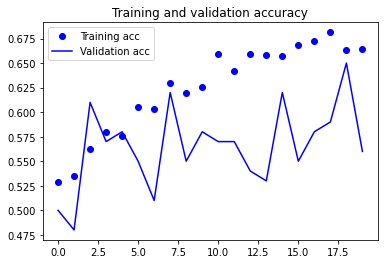

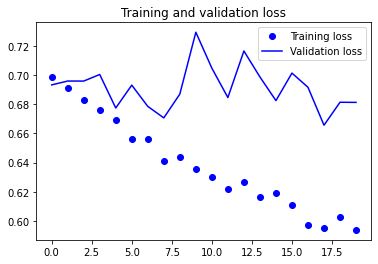

In [25]:
# 認識率と誤差をプロット
import matplotlib.pyplot as plt

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs = range(len(acc2))

plt.plot(epochs, acc2, 'bo', label='Training acc')
plt.plot(epochs, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'bo', label='Training loss')
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 学習の継続


In [26]:
# 引き続き学習を続けてみる
history2 = model2.fit(train_generator, steps_per_epoch=X_train.shape[0]//5, epochs=50, validation_data=val_generator, validation_steps=X_test.shape[0]//5)

# 再度学習したモデルを保存
model2.save('cats_and_dogs_2_2.h5')

Epoch 1/50
253/253 [==============================] - 19s 75ms/step - loss: 0.5898 - acc: 0.6877 - val_loss: 0.6457 - val_acc: 0.6000
Epoch 2/50
253/253 [==============================] - 19s 74ms/step - loss: 0.5967 - acc: 0.6783 - val_loss: 0.6417 - val_acc: 0.6700
Epoch 3/50
253/253 [==============================] - 18s 72ms/step - loss: 0.5868 - acc: 0.6743 - val_loss: 0.6376 - val_acc: 0.6300
Epoch 4/50
253/253 [==============================] - 18s 72ms/step - loss: 0.5866 - acc: 0.6791 - val_loss: 0.6138 - val_acc: 0.6700
Epoch 5/50
253/253 [==============================] - 19s 77ms/step - loss: 0.5686 - acc: 0.7028 - val_loss: 0.7454 - val_acc: 0.6100
Epoch 6/50
253/253 [==============================] - 18s 73ms/step - loss: 0.5766 - acc: 0.6909 - val_loss: 0.5908 - val_acc: 0.7100
Epoch 7/50
253/253 [==============================] - 18s 72ms/step - loss: 0.5636 - acc: 0.7012 - val_loss: 0.6439 - val_acc: 0.7100
Epoch 8/50
253/253 [==============================] - 19s 74ms

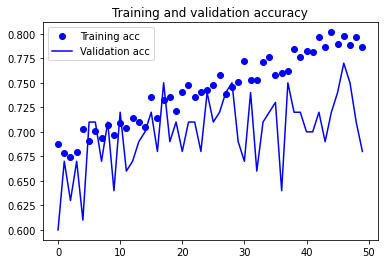

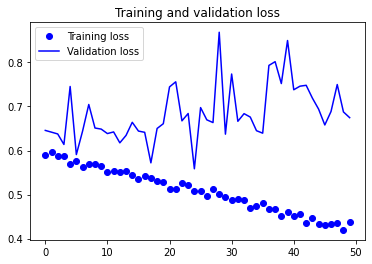

In [27]:
# 再度、認識率と誤差をプロット
import matplotlib.pyplot as plt

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs = range(len(acc2))

plt.plot(epochs, acc2, 'bo', label='Training acc')
plt.plot(epochs, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'bo', label='Training loss')
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 再度、ネットワークの構築


In [28]:
# model3で構築

# Conv層：　フィルタ数：32、フィルタサイズ：3×3、ReLU 入力画像サイズ：256×256×3チャネル
# MaxPooling層：　サイズ：2×2
# Conv層：　フィルタ数：64、フィルタサイズ：3×3、ReLU
# MaxPooling層：　サイズ：2×2
# Conv層：　フィルタ数：128、フィルタサイズ：3×3、ReLU
# MaxPooling層：　サイズ：2×2
# Conv層：　フィルタ数：128、フィルタサイズ：3×3、ReLU
# MaxPooling層：　サイズ：2×2
# テンソルのフラット化
# model3.add(layers.Dropout(0.5))
# Dense層：　ユニット数：512、ReLU
# 出力層（Dense層）：　ユニット数：num_classes、softmax

# ==================================================================
model3 = models.Sequential()

model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(num_classes, activation='softmax'))
# ==================================================================

#### コンパイル・学習・保存


In [29]:
# 同じ設定でコンパイル
model3.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['acc'])

# 学習の実施（history3としてログを記録）
history3 = model3.fit(train_generator, steps_per_epoch=X_train.shape[0]//5, epochs=100, validation_data=val_generator, validation_steps=X_test.shape[0]//5)

# 再度学習したモデルを保存
model3.save('cats_and_dogs_3.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
253/253 [==============================] - 19s 73ms/step - loss: 0.6990 - acc: 0.4933 - val_loss: 0.6922 - val_acc: 0.5600
Epoch 2/100
253/253 [==============================] - 19s 76ms/step - loss: 0.6890 - acc: 0.5296 - val_loss: 0.6947 - val_acc: 0.5000
Epoch 3/100
253/253 [==============================] - 19s 74ms/step - loss: 0.6847 - acc: 0.5565 - val_loss: 0.7017 - val_acc: 0.5600
Epoch 4/100
253/253 [==============================] - 18s 72ms/step - loss: 0.6779 - acc: 0.5779 - val_loss: 0.6930 - val_acc: 0.5800
Epoch 5/100
253/253 [==============================] - 18s 73ms/step - loss: 0.6713 - acc: 0.5897 - val_loss: 0.6814 - val_acc: 0.5700
Epoch 6/100
253/253 [==============================] - 19s 76ms/step - loss: 0.6608 - acc: 0.5984 - val_loss: 0.7316 - val_acc: 0.5500
Epoch 7/100
253/253 [==============================] - 18s 73ms/step - loss: 0.6589 - acc: 0.5810 - val_loss: 0.6819 - val_acc: 0.5600
Epoch 8/100
253/253 [==============================] - 

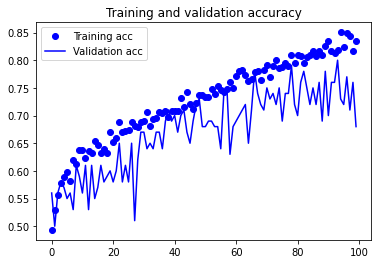

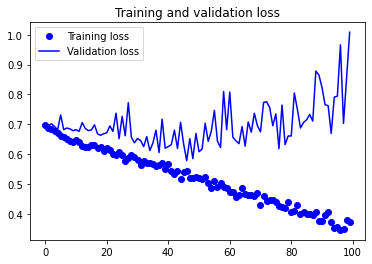

In [30]:
# 再度、認識率と誤差をプロット
import matplotlib.pyplot as plt

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
epochs = range(len(acc3))

plt.plot(epochs, acc3, 'bo', label='Training acc')
plt.plot(epochs, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss3, 'bo', label='Training loss')
plt.plot(epochs, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 最終的なテストデータの認識率


In [31]:
test_loss, test_acc = model3.evaluate(val_generator, steps=X_test.shape[0]//5)
print('test acc', test_acc)

20/20 [==============================] - 0s 8ms/step - loss: 1.0081 - acc: 0.6800
test acc 0.6800000071525574


#### Data Augmentation＋Dropoutの効果

各手法の適用なしの場合と比べ、結果はどう変化したか？

***
- 各手法なしの場合、trainingデータのAccuracyは学習が進むごとに向上し18epochsでおよそ1.0で、一方のvalidationデータのAccuracyは学習が進んでも向上せず、18epochsで

### 更なる改善
- 以下のパラメータを可能な範囲でチューニングし、認識率を更に向上できるように試行錯誤し報告
  - モデルのインスタンス名は設定毎に別にすること

- Conv層のフィルタ数
- Conv層（及びPooling層）の数
- Dense層のユニット数
- Dropoutの挿入位置・確率
- Epoch数
- 学習率


In [32]:
# model4で構築
# ==================================================================
model4 = models.Sequential()

model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dropout(0.8))
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(num_classes, activation='softmax'))
# ==================================================================

In [33]:
# 同じ設定でコンパイル
model4.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['acc'])

# 学習の実施（history4としてログを記録）
history4 = model4.fit(train_generator, steps_per_epoch=X_train.shape[0]//5, epochs=100, validation_data=val_generator, validation_steps=X_test.shape[0]//5)

# 再度学習したモデルを保存
model4.save('cats_and_dogs_4.h5')

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


253/253 [==============================] - 19s 72ms/step - loss: 0.7032 - acc: 0.5186 - val_loss: 0.7026 - val_acc: 0.5000
Epoch 2/100
253/253 [==============================] - 19s 76ms/step - loss: 0.6936 - acc: 0.5115 - val_loss: 0.6892 - val_acc: 0.5500
Epoch 3/100
253/253 [==============================] - 19s 75ms/step - loss: 0.6806 - acc: 0.5478 - val_loss: 0.6902 - val_acc: 0.5400
Epoch 4/100
253/253 [==============================] - 19s 76ms/step - loss: 0.6753 - acc: 0.5826 - val_loss: 0.6760 - val_acc: 0.5300
Epoch 5/100
253/253 [==============================] - 18s 73ms/step - loss: 0.6718 - acc: 0.5794 - val_loss: 0.6797 - val_acc: 0.5700
Epoch 6/100
253/253 [==============================] - 18s 72ms/step - loss: 0.6609 - acc: 0.6008 - val_loss: 0.6721 - val_acc: 0.6200
Epoch 7/100
253/253 [==============================] - 19s 75ms/step - loss: 0.6561 - acc: 0.6032 - val_loss: 0.6879 - val_acc: 0.5600
Epoch 8/100
253/253 [==============================] - 19s 76ms/ste

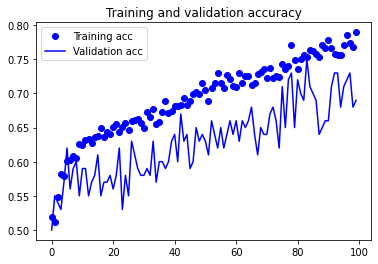

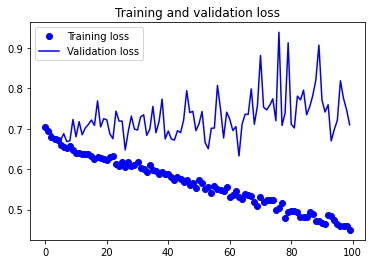

In [34]:
# 再度、認識率と誤差をプロット
import matplotlib.pyplot as plt

acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']
epochs = range(len(acc4))

plt.plot(epochs, acc4, 'bo', label='Training acc')
plt.plot(epochs, val_acc4, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss4, 'bo', label='Training loss')
plt.plot(epochs, val_loss4, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
test_loss, test_acc = model4.evaluate(val_generator, steps=X_test.shape[0]//5)
print('test acc', test_acc)

20/20 [==============================] - 0s 9ms/step - loss: 0.7100 - acc: 0.6900
test acc 0.6899999976158142


In [36]:
# model5で構築
# ==================================================================
model5 = models.Sequential()

model5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Flatten())
model5.add(layers.Dropout(0.9))
model5.add(layers.Dense(512, activation='relu'))
model5.add(layers.Dense(num_classes, activation='softmax'))
# ==================================================================

In [37]:
# 同じ設定でコンパイル
model5.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['acc'])

# 学習の実施（history4としてログを記録）
history5 = model5.fit(train_generator, steps_per_epoch=X_train.shape[0]//5, epochs=100, validation_data=val_generator, validation_steps=X_test.shape[0]//5)

# 再度学習したモデルを保存
model5.save('cats_and_dogs_5.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
253/253 [==============================] - 19s 74ms/step - loss: 0.7049 - acc: 0.5320 - val_loss: 0.6932 - val_acc: 0.5100
Epoch 2/100
253/253 [==============================] - 18s 72ms/step - loss: 0.7009 - acc: 0.4822 - val_loss: 0.6916 - val_acc: 0.4900
Epoch 3/100
253/253 [==============================] - 18s 72ms/step - loss: 0.6895 - acc: 0.5257 - val_loss: 0.7013 - val_acc: 0.5000
Epoch 4/100
253/253 [==============================] - 19s 76ms/step - loss: 0.6838 - acc: 0.5542 - val_loss: 0.7005 - val_acc: 0.4700
Epoch 5/100
253/253 [==============================] - 19s 74ms/step - loss: 0.6767 - acc: 0.5684 - val_loss: 0.6980 - val_acc: 0.5500
Epoch 6/100
253/253 [==============================] - 19s 75ms/step - loss: 0.6753 - acc: 0.5668 - val_loss: 0.6928 - val_acc: 0.5600
Epoch 7/100
253/253 [==============================] - 18s 72ms/step - loss: 0.6701 - acc: 0.5826 - val_loss: 0.7409 - val_acc: 0.5200
Epoch 8/100
253/253 [==============================] - 

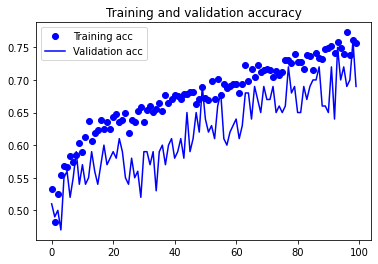

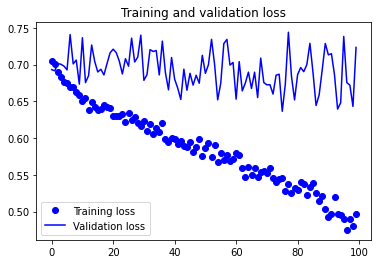

In [38]:
# 再度、認識率と誤差をプロット
import matplotlib.pyplot as plt

acc5 = history5.history['acc']
val_acc5 = history5.history['val_acc']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']
epochs = range(len(acc5))

plt.plot(epochs, acc5, 'bo', label='Training acc')
plt.plot(epochs, val_acc5, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss5, 'bo', label='Training loss')
plt.plot(epochs, val_loss5, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [40]:
test_loss, test_acc = model5.evaluate(val_generator, steps=X_test.shape[0]//5)
print('test acc', test_acc)

20/20 [==============================] - 0s 9ms/step - loss: 0.7234 - acc: 0.6900
test acc 0.6899999976158142


In [41]:
# model6で構築
# ==================================================================
model6 = models.Sequential()

model6.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(128, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(128, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Flatten())
model6.add(layers.Dropout(0.3))
model6.add(layers.Dense(512, activation='relu'))
model6.add(layers.Dense(num_classes, activation='softmax'))
# ==================================================================

In [42]:
# 同じ設定でコンパイル
model6.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['acc'])

# 学習の実施（history4としてログを記録）
history6 = model6.fit(train_generator, steps_per_epoch=X_train.shape[0]//5, epochs=100, validation_data=val_generator, validation_steps=X_test.shape[0]//5)

# 再度学習したモデルを保存
model6.save('cats_and_dogs_6.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
253/253 [==============================] - 20s 77ms/step - loss: 0.6988 - acc: 0.5249 - val_loss: 0.6915 - val_acc: 0.5600
Epoch 2/100
253/253 [==============================] - 20s 77ms/step - loss: 0.6899 - acc: 0.5399 - val_loss: 0.6919 - val_acc: 0.5100
Epoch 3/100
253/253 [==============================] - 18s 73ms/step - loss: 0.6826 - acc: 0.5676 - val_loss: 0.6899 - val_acc: 0.6100
Epoch 4/100
253/253 [==============================] - 18s 73ms/step - loss: 0.6835 - acc: 0.5605 - val_loss: 0.6802 - val_acc: 0.5900
Epoch 5/100
253/253 [==============================] - 20s 77ms/step - loss: 0.6706 - acc: 0.5779 - val_loss: 0.6725 - val_acc: 0.5800
Epoch 6/100
253/253 [==============================] - 19s 74ms/step - loss: 0.6685 - acc: 0.5905 - val_loss: 0.6718 - val_acc: 0.6000
Epoch 7/100
253/253 [==============================] - 18s 72ms/step - loss: 0.6680 - acc: 0.5708 - val_loss: 0.6792 - val_acc: 0.6000
Epoch 8/100
253/253 [==============================] - 

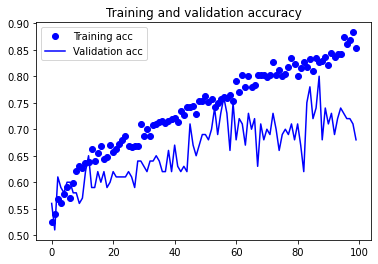

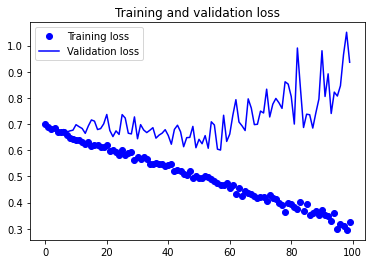

In [43]:
# 再度、認識率と誤差をプロット
import matplotlib.pyplot as plt

acc6 = history6.history['acc']
val_acc6 = history6.history['val_acc']
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']
epochs = range(len(acc5))

plt.plot(epochs, acc6, 'bo', label='Training acc')
plt.plot(epochs, val_acc6, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss6, 'bo', label='Training loss')
plt.plot(epochs, val_loss6, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [44]:
test_loss, test_acc = model6.evaluate(val_generator, steps=X_test.shape[0]//5)
print('test acc', test_acc)

20/20 [==============================] - 0s 8ms/step - loss: 0.9365 - acc: 0.6800
test acc 0.6800000071525574
